# Pendulum Models
Lorem ipsum blah blah blah.

## Free Response Pendulum

The equation of motion of a pendulum is $\ddot{\theta}+\frac{g}{L} sin \theta=0$, where $g$ is the acceleration due to gravity and $L$ is the length of the massless string holding the "bob."

### Linearized Model
By using a small angle approximation for $sin \theta$ such that $sin \theta \approx \theta$, the linearized equation of motion is $\ddot{\theta}+\frac{g}{L} \theta=0$.

The second-order differential equation can then be reduced to a system of first-order differential equations by defining the state vector as $\textbf{x}=[x_{1}$ $x_{2}]^{T}$, where $x_{1}$ corresponds to $\theta$ and $x_{2}$ corresponds to $\dot{\theta}$.

The system of equations is thus

\begin{cases}
      \dot{x}_{1}=x_2 \\
      \dot{x}_{2}=-\frac{g}{L} x_{1} \\
\end{cases}\,.

The linearized model is solved below using `odeint` for initial conditions at $\textbf{x} (0)= [0$ $0]^{T}$, $\textbf{x}(0) = [0.5^{\circ}$ $0]^{T}$, and $\textbf{x}(0) = [15^{\circ}$ $0]^{T}$

In [79]:
# Import modules
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

%matplotlib inline

In [80]:
# Input function for odeint
def pendulum(x, t, g, L):
    x1, x2 = x

    # Equation of motion
    dxdt = [x2,
            g / L * x1]

    return dxdt

g = -9.81 # m/s2
L = 6 # m

# Run for 10 seconds
t = np.linspace(0, 10, 1000)

In [81]:
# Initial conditions: [0 0]'
x0 = [0, 0]
sol1L = odeint(pendulum, x0, t, args=(g, L))

# Initial conditions: [0.5deg 0]'
x0 = [0.5 * np.pi / 180, 0]
sol2L = odeint(pendulum, x0, t, args=(g, L))

# Initial conditions: [15deg 0]'
x0 = [15 * np.pi / 180, 0]
sol3L = odeint(pendulum, x0, t, args=(g, L))


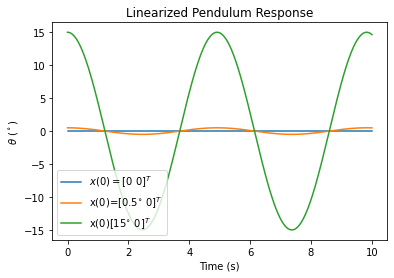

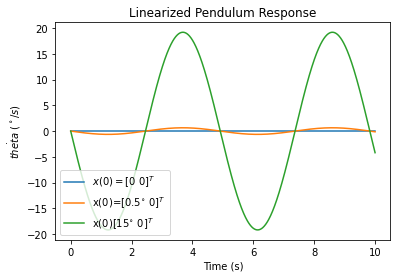

In [83]:
# Plot response
plt.figure(1)
plt.plot(t, sol1L[:, 0], label=R"$x(0)=[0$ $0]^{T}$")
plt.plot(t, sol2L[:, 0] * 180 / np.pi, label=R"x(0)=$[0.5^{\circ}$ $0]^{T}$")
plt.plot(t, sol3L[:, 0] * 180 / np.pi, label=R"x(0)=$[15^{\circ}$ $0]^{T}$")
plt.title("Linearized Pendulum Displacement Response")
plt.xlabel("Time (s)")
plt.ylabel(R"$\theta$ ($^\circ$)")
plt.legend(loc="lower left")

plt.figure(2)
plt.plot(t, sol1L[:, 1], label=R"$x(0)=[0$ $0]^{T}$")
plt.plot(t, sol2L[:, 1] * 180 / np.pi, label=R"x(0)=$[0.5^{\circ}$ $0]^{T}$")
plt.plot(t, sol3L[:, 1] * 180 / np.pi, label=R"x(0)=$[15^{\circ}$ $0]^{T}$")
plt.title("Linearized Pendulum Velocity Response")
plt.xlabel("Time (s)")
plt.ylabel(R"$\dot{theta}$ ($^\circ/s$)")
plt.legend(loc="lower left")

### Nonlinear Model
The nonlinear equation of motion is solved using `odeint` at the same initial conditions considered above.

In [65]:
# Input function for odeint
def pendulum(x, t, g, L):
    x1, x2 = x

    # Equation of motion
    dxdt = [x2,
            g / L * np.sin(x1)]

    return dxdt

g = -9.81 # m/s2
L = 6 # m

# Run for 10 seconds
t = np.linspace(0, 10, 1000)

In [66]:
# Initial conditions: [0 0]'
x0 = [0, 0]
sol1NL = odeint(pendulum, x0, t, args=(g, L))

# Initial conditions: [0.5deg 0]'
x0 = [0.5 * np.pi / 180, 0]
sol2NL = odeint(pendulum, x0, t, args=(g, L))

# Initial conditions: [15deg 0]'
x0 = [15 * np.pi / 180, 0]
sol3NL = odeint(pendulum, x0, t, args=(g, L))

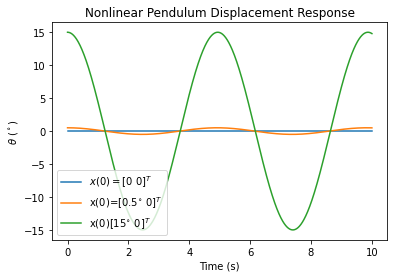

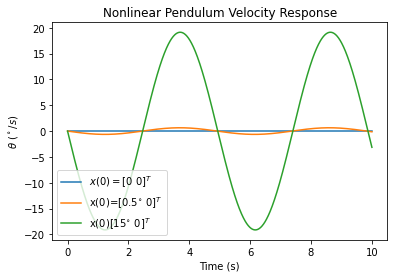

In [93]:
# Plot response
plt.figure(1)
plt.plot(t, sol1NL[:, 0], label=R"$x(0)=[0$ $0]^{T}$")
plt.plot(t, sol2NL[:, 0] * 180 / np.pi, label=R"x(0)=$[0.5^{\circ}$ $0]^{T}$")
plt.plot(t, sol3NL[:, 0] * 180 / np.pi, label=R"x(0)=$[15^{\circ}$ $0]^{T}$")
plt.title("Nonlinear Pendulum Displacement Response")
plt.xlabel("Time (s)")
plt.ylabel(R"$\theta$ ($^\circ$)")
plt.legend(loc="lower left")

# Plot response
plt.figure(2)
plt.plot(t, sol1NL[:, 1], label=R"$x(0)=[0$ $0]^{T}$")
plt.plot(t, sol2NL[:, 1] * 180 / np.pi, label=R"x(0)=$[0.5^{\circ}$ $0]^{T}$")
plt.plot(t, sol3NL[:, 1] * 180 / np.pi, label=R"x(0)=$[15^{\circ}$ $0]^{T}$")
plt.title("Nonlinear Pendulum Velocity Response")
plt.xlabel("Time (s)")
plt.ylabel(R"$\theta$ ($^\circ/s$)")
plt.legend(loc="lower left")

### Validating the Linear Model
The results for both the linear and nonlinear models are compared below. It is assumed that smaller angles are approximated well; because 15 degrees is the maximum value used for testing, that is what is compared below.

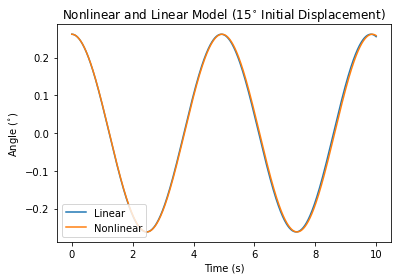

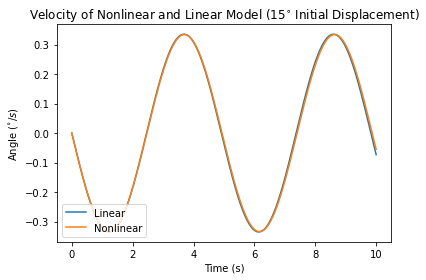

In [118]:
plt.figure(1)
plt.title(R"Nonlinear and Linear Model (15$^{\circ}$ Initial Displacement)")
plt.plot(t, sol3L[:, 0], label="Linear")
plt.plot(t, sol3NL[:, 0], label="Nonlinear")
plt.xlabel("Time (s)")
plt.ylabel(R"Angle ($^{\circ})$")
plt.legend(loc="lower left")

plt.figure(2)
plt.title(R"Velocity of Nonlinear and Linear Model (15$^{\circ}$ Initial Displacement)")
plt.plot(t, sol3L[:, 1], label="Linear")
plt.plot(t, sol3NL[:, 1], label="Nonlinear")
plt.xlabel("Time (s)")
plt.ylabel(R"Angle ($^{\circ}/s)$")
plt.legend(loc="lower left")

### Error Calculation
The error between the linear model and nonlinear model is calculated to assess the accuracy of the nonlinear model.

In [158]:
def error(linear, nonlinear):
    sum_disp = 0
    sum_vel = 0
    for i in range(len(linear)):
        sum_disp += (nonlinear[i, 0] - linear[i, 0]) ** 2

        sum_vel += (nonlinear[i, 1] - linear[i, 1]) ** 2

    return sum_disp / len(linear), sum_vel / len(linear)

In [159]:
error(sol3L, sol3NL)

(3.235450191769481e-05, 5.852890370534965e-05)

The error between the linear model and nonlinear model is found to be nearly zero, validating the use of a linearized system for a PID controller.

# Conclusion
An error of nearly zero shows the accuracy of a linearized pendulum model with an initial displacement of zero degrees. The linearized equation of motion will be used to model a PID on a forced pendulum. 